<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/6/6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 本コードは以下のサイトを参考にしました
- https://qiita.com/fujin/items/bd58fc7a93dc6e001045

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs
%matplotlib inline

X[:5] = [[ 0.92141506 -9.98499137]
 [-5.26927614 -9.6186543 ]
 [-0.45292089 -6.04316334]
 [-0.0856312  -2.16867404]
 [ 1.53194956 -0.36022153]]
y[:5] = [0 0 0 1 1]


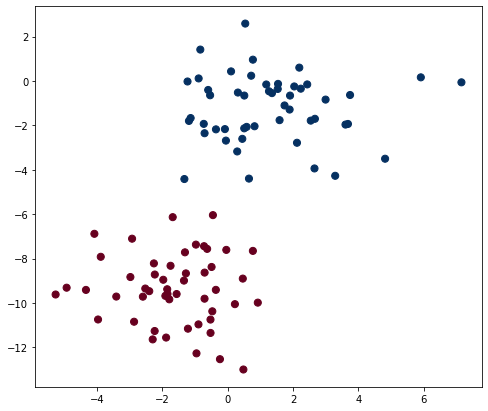

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, random_state=2, centers=2, cluster_std=1.5)

print("X[:5] =", X[:5])
print("y[:5] =", y[:5])

plt.figure(figsize=(8, 7))
plt.scatter(X[:, 0], X[:, 1], c=y,  s=50, cmap='RdBu')
plt.show()

In [3]:
model = GaussianNB()
model.fit(X, y)
model.predict(X[:5])

array([0, 0, 0, 1, 1])

In [4]:
resolution=0.02
x1_min = -6
x1_max = 8
x2_min = -14
x2_max = 4
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))

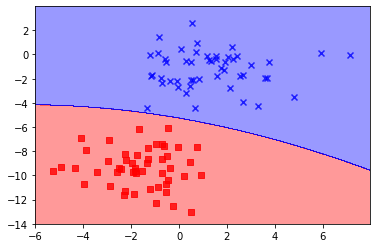

In [5]:
from matplotlib.colors import ListedColormap
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
markers = ('s', 'x', 'o', '^', 'v')

# 予測
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=[cmap(idx)],
                marker=markers[idx], label=cl)

In [6]:
rnd = np.random.RandomState(0)
X_test = [-6, -14] + [14, 18] * rnd.rand(2000, 2)
Y_prob = model.predict_proba(X_test)
print(Y_prob[20:30].round(2)) # 小数点第２位まで表示

[[0.98 0.02]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.56 0.44]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]


In [7]:
D = np.array([xx1.ravel(), xx2.ravel()]).T
Z_prob = model.predict_proba(D)

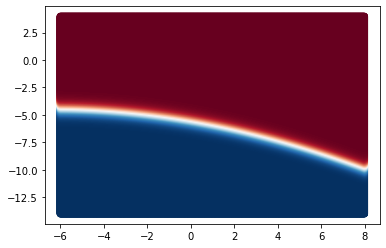

In [8]:
plt.scatter(D[:, 0], D[:, 1], c=Z_prob[:, 0], cmap='RdBu')
plt.show()

In [9]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB

X = np.random.randint(2, size=(6, 100))
Y = np.array([1, 2, 3, 4, 4, 5])

print("X[:1] =", X[:1])

model = BernoulliNB()
model.fit(X, Y)

print("Predicted Class = ", model.predict(X[2:3]))

X[:1] = [[1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1
  1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1
  0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0]]
Predicted Class =  [3]


In [10]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB

X = np.random.randint(5, size=(6, 100))
Y = np.array([1, 2, 3, 4, 4, 5])

print("X[:1] =", X[:1])

clf = MultinomialNB()
clf.fit(X, Y)

print("Predicted Class = ", clf.predict(X[2:3]))

X[:1] = [[2 0 2 0 1 1 2 2 2 4 4 1 0 2 1 4 3 4 2 2 1 0 2 0 3 0 4 4 2 1 3 1 3 3 1 3
  2 2 1 3 3 4 1 4 0 1 0 2 2 4 1 0 1 3 4 2 1 3 4 2 3 2 2 3 1 1 4 0 2 2 2 4
  3 0 4 0 2 2 4 4 1 4 1 3 3 4 0 1 0 0 0 4 0 4 2 2 0 2 3 2]]
Predicted Class =  [3]


In [11]:
# 各クラスの確率
Y_probs = clf.predict_proba(X[2:3])

for Y_prob in Y_probs:
  for i in range(Y_prob.shape[0]):
    print("Class [%d] : " % (i+1), Y_prob[i].round(2))

Class [1] :  0.0
Class [2] :  0.0
Class [3] :  1.0
Class [4] :  0.0
Class [5] :  0.0
